In [2]:
# 구글 드라이브에서 데이터 다운로드

import gdown
gdown.download('https://bit.ly/3pK7iuu','ns_book7.csv',quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 137MB/s]


'ns_book7.csv'

In [3]:
# 다운로드 받은 데이터를 제대로 불러왔는지 head() 함수를 호출하여 확인

import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv',low_memory=False)
ns_book7.head()

번호                    도서명                저자    출판사  발행년도           ISBN  \
0   1                인공지능과 흙            김동훈 지음    민음사  2021  9788937444319   
1   2           가짜 행복 권하는 사회            김태형 지음   갈매나무  2021  9791190123969   
2   3  나도 한 문장 잘 쓰면 바랄 게 없겠네            김선영 지음   블랙피쉬  2021  9788968332982   
3   4                예루살렘 해변  이도 게펜 지음, 임재희 옮김  문학세계사  2021  9788970759906   
4   5  김성곤의 중국한시기행 : 장강·황하 편            김성곤 지음    김영사  2021  9788934990833   

  세트 ISBN 부가기호    권 주제분류번호  도서권수  대출건수        등록일자  
0     NaN  NaN  NaN    NaN     1     0  2021-03-19  
1     NaN  NaN  NaN    NaN     1     0  2021-03-19  
2     NaN  NaN  NaN    NaN     1     0  2021-03-19  
3     NaN  NaN  NaN    NaN     1     0  2021-03-19  
4     NaN  NaN  NaN    NaN     1     0  2021-03-19

In [4]:
#발행년도별 도서 개수 출력
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

In [5]:
#발행년도별 도서 개수 오름차순으로 정렬
count_by_year = count_by_year.sort_index()
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [6]:
#발행년도가 비정상적인 데이터 제거(발행년도가 2030년보다 작거나 같은 경우만 사용)
count_by_year = count_by_year[count_by_year.index<=2030]
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

In [7]:
# 주제별 도서 개수 구하기(주제분류번호로 구분)
import numpy as np

def kdc_1st_char(no):
  if no is np.nan:
    return '-1'
  else:
    return no[0]

count_by_subject =ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

In [8]:
# 맷플롯립의 DPI 기본값 변경
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

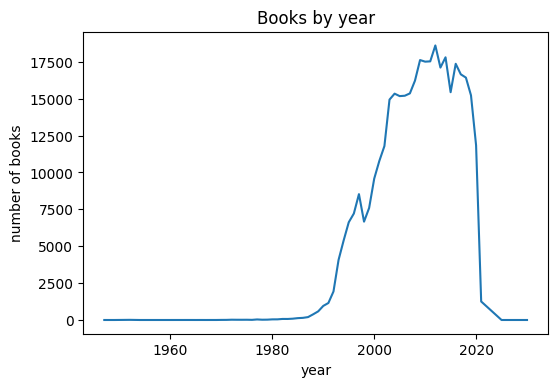

In [9]:
# 선 그래프 그리기

plt.plot(count_by_year.index,count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

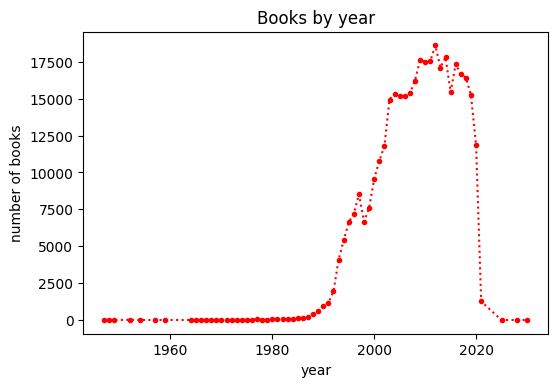

In [10]:
# 선모양과 색상 바꾸기

# x,y축을 지정하지 않고 시리즈 객체 그대로 전달하여 자동으로 그래프를 그림
plt.plot(count_by_year,marker=".",linestyle=":",color='red') 
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

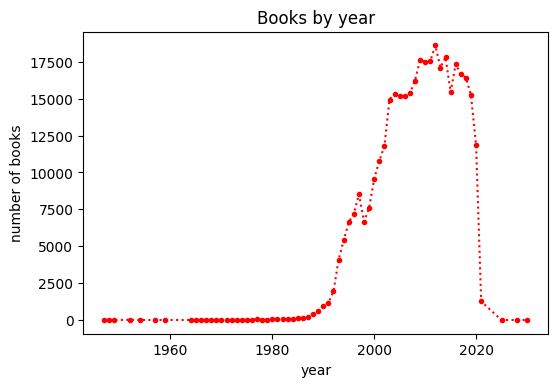

In [11]:
# 선모양과 색상 바꾸기 (포맷을 하나의 문자열로 전달)

# 마커, 선모양, 색깔 옵션을 하나의 문자열로 지정(색 이름은 첫글자를 사용)
plt.plot(count_by_year,'.:r') 
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

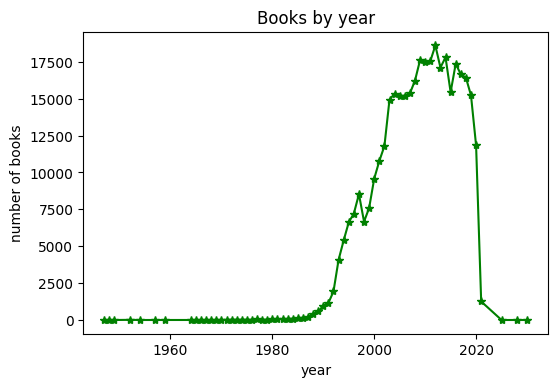

In [12]:
# 별 모양 마커와 실선을 사용한 선그래프를 녹색으로 그리기

plt.plot(count_by_year,'*-g') 
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

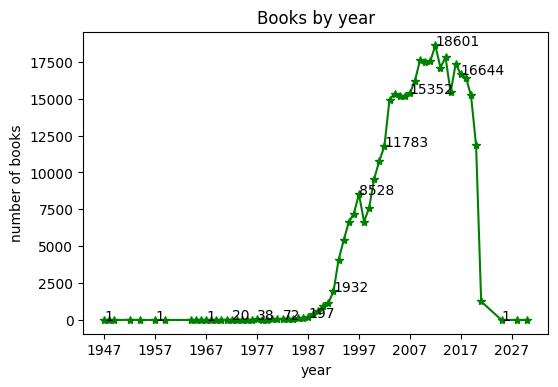

In [ ]:
# 선 그래프 눈금 개수 조절 및 마커에 텍스트 표시하기

plt.plot(count_by_year,'*-g') 
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947,2030,10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val,(idx,val))
plt.show()

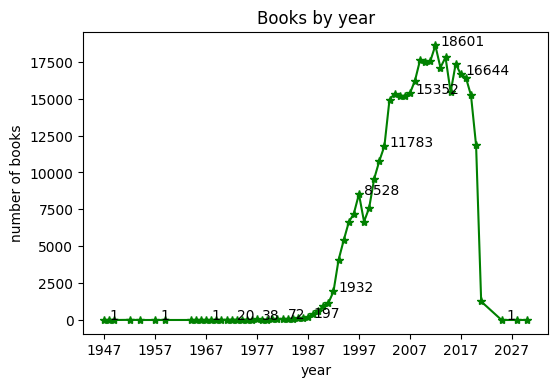

In [ ]:
# 마커에 텍스트 표시 위치 조정하기

plt.plot(count_by_year,'*-g') 
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947,2030,10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val,(idx,val),xytext=(idx+1,val+10))
plt.show()

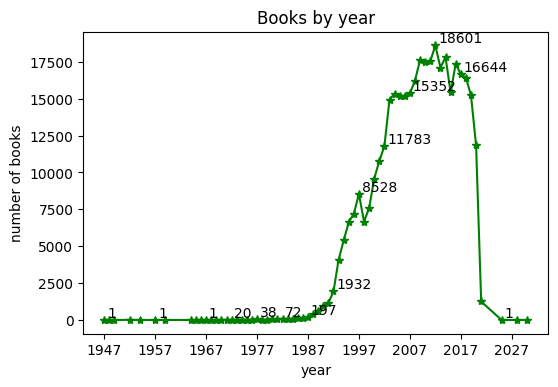

In [ ]:
# 마커에 텍스트 표시 위치 조정하기(상대위치 사용)

plt.plot(count_by_year,'*-g') 
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947,2030,10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val,(idx,val),xytext=(2,2),textcoords='offset points')
plt.show()

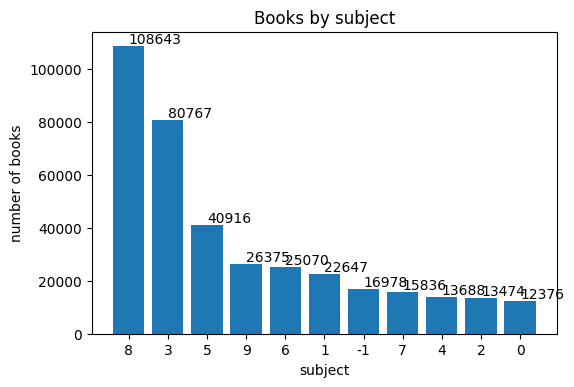

In [ ]:
# 막대 그래프 그리기

plt.bar(count_by_subject.index, count_by_subject.values)
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords="offset points")
plt.show()


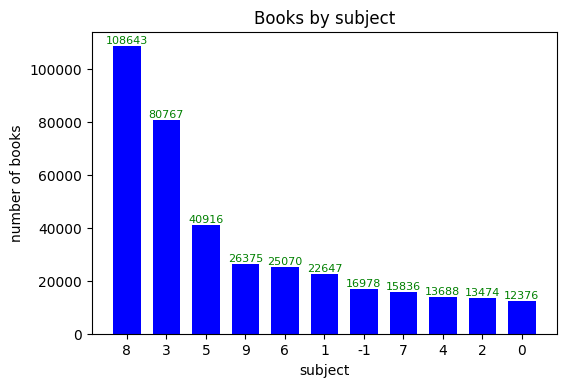

In [ ]:
# 막대 그래프 그리기(텍스트 정렬, 막대조절 및 색상바꾸기)

plt.bar(count_by_subject.index, count_by_subject.values, width=0.7,color='blue')
plt.title("Books by subject")
plt.xlabel("subject")
plt.ylabel("number of books")
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords="offset points",
               fontsize=8, ha='center', color='green')
plt.show()

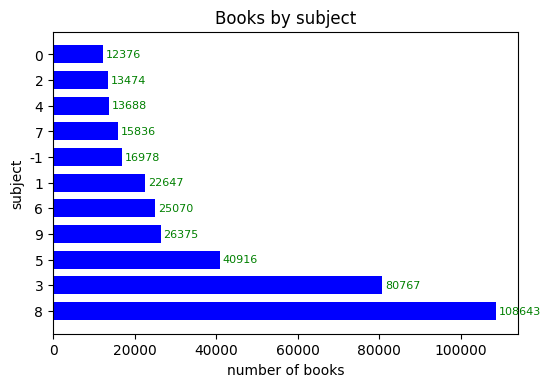

In [ ]:
# 가로 막대 그래프 그리기

plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title("Books by subject")
plt.xlabel("number of books")
plt.ylabel("subject")
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext=(2,0), textcoords="offset points",
               fontsize=8, va='center', color='green')
plt.show()

In [ ]:
# 샘플 이미지 다운로드
import sys
if 'google.colab' in sys.modules:
  !wget https://bit.ly/3wrj4xf -O jupiter.png

--2023-02-11 17:36:26--  https://bit.ly/3wrj4xf
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png [following]
--2023-02-11 17:36:26--  https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287363 (3.1M) [image/png]
Saving to: ‘jupiter.png’

jupiter.png         100%[===================>]   3.13M  --.-KB/s    in 0.07s   

2023-02-11 17:36:26 (46.3 MB/s) - ‘jupiter.png’ saved [3287363/3287363]



In [ ]:
# 이미지 읽기
img = plt.imread('jupiter.png')
img.shape # 반환값은 높이, 너비, 채널

(1561, 1646, 3)

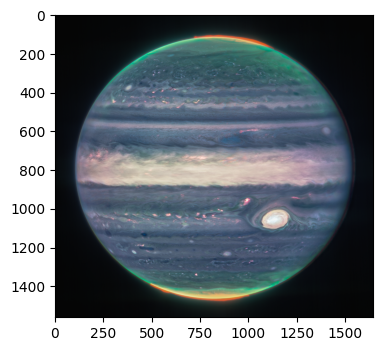

In [ ]:
# 이미지 출력하기

plt.imshow(img)
plt.show()

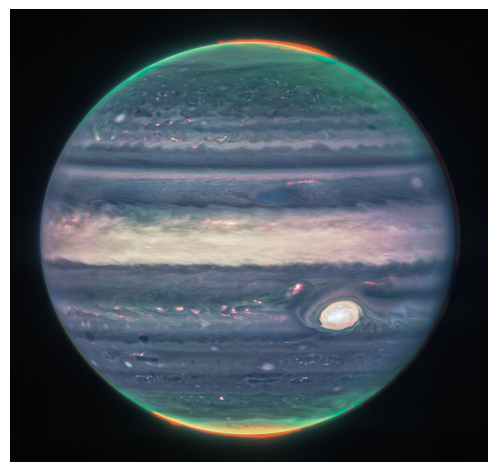

In [ ]:
# 이미지 출력하기(크기 변경, 눈금 출력 제외)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.show()

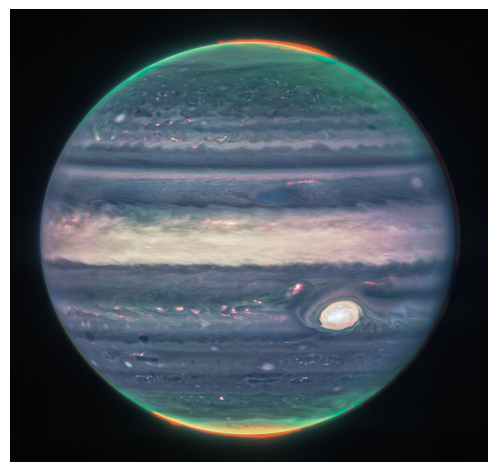

In [ ]:
# Pilow 패키지를 이용하여 이미지 출력

from PIL import Image
pil_img = Image.open('jupiter.png')
plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()

In [ ]:
# 이미지 객체 정보 확인

import numpy as np

arr_img = np.array(pil_img)
arr_img.shape

(1561, 1646, 3)

In [ ]:
# 이미지 저장하기

plt.imsave('jupiter.jpg',arr_img)

In [ ]:
# savefig() 함수를 사용하여 그래프를 저장할 때 사용할 DPI 확인

plt.rcParams['savefig.dpi']

'figure'

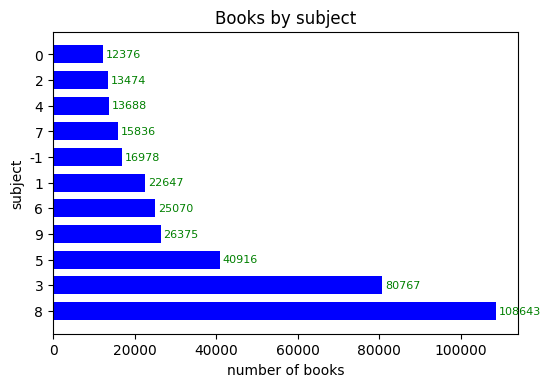

In [ ]:
# 그래프 저장하기

plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title("Books by subject")
plt.xlabel("number of books")
plt.ylabel("subject")
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext=(2,0), textcoords="offset points",
               fontsize=8, va='center', color='green')
plt.savefig('books_by_subject.png')
plt.show()

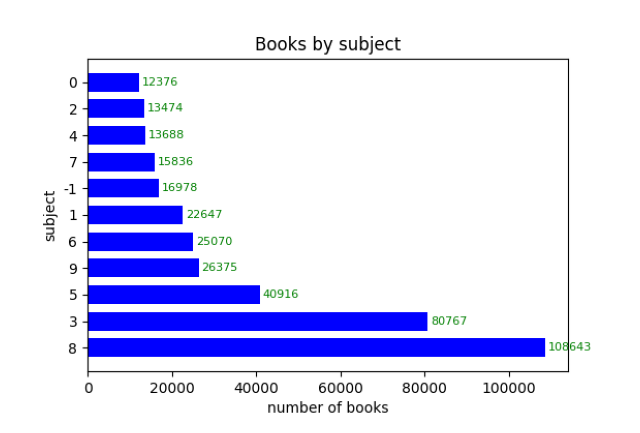

In [ ]:
# 저장된 그래프 이미지 출력하기

pil_img = Image.open('books_by_subject.png')
plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()